In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Data overview and EDA

In [ ]:
data=pd.read_csv("bankloan.csv")
data.head()


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data=data.rename(columns={'Personal.Loan':'PersonalLoan'})

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
x=data.drop(['ID','PersonalLoan','ZIP.Code','Experience','Online','CreditCard'],axis=1)

In [ ]:
x

,Age,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account
0,25,49,4,1.6,1,0,1,0
1,45,34,3,1.5,1,0,1,0
2,39,11,1,1.0,1,0,0,0
3,35,100,1,2.7,2,0,0,0
4,35,45,4,1.0,2,0,0,0
...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0
4996,30,15,4,0.4,1,85,0,0
4997,63,24,2,0.3,3,0,0,0
4998,65,49,3,0.5,2,0,0,0


In [ ]:
data.shape

(5000, 14)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP.Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   PersonalLoan        5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data['ID'].nunique()

5000

In [ ]:
data['Age'].nunique()

45

In [ ]:
data['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

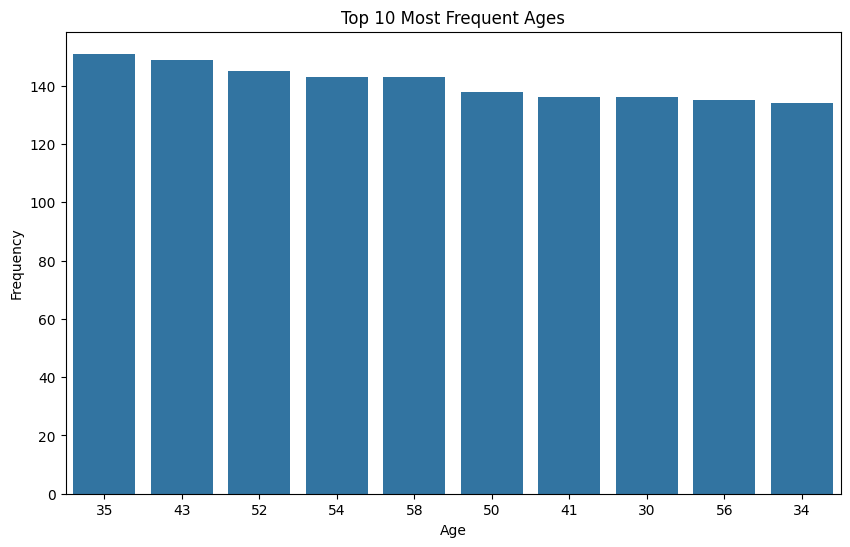

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=data['Age'].value_counts().head(10).index,
    y=data['Age'].value_counts().head(10).values,
    order=data['Age'].value_counts().head(10).index.tolist()
)


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Ages')


plt.show()

In [ ]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
data['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [ ]:
data['Experience']=data['Experience'].apply(lambda x :  abs(x) if x<0 else x)

In [ ]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [ ]:
data['ZIP.Code'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [ ]:
data['Family'].unique()

array([4, 3, 1, 2])

In [ ]:
data['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
data['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [ ]:
data['Education'].unique()

array([1, 2, 3])

In [ ]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
data['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [ ]:
data['Mortgage'].value_counts()

0      3462
98       17
119      16
89       16
91       16
       ... 
547       1
458       1
505       1
361       1
541       1
Name: Mortgage, Length: 347, dtype: int64

In [ ]:
data['PersonalLoan'].unique()

array([0, 1])

In [ ]:
data['PersonalLoan'].value_counts()


0    4520
1     480
Name: PersonalLoan, dtype: int64

In [ ]:
data['Securities.Account'].unique()

array([1, 0])

In [ ]:
data['Securities.Account'].value_counts()

0    4478
1     522
Name: Securities.Account, dtype: int64

In [ ]:
data['CD.Account'].unique()

array([0, 1])

In [ ]:
data['CD.Account'].value_counts()

0    4698
1     302
Name: CD.Account, dtype: int64

In [ ]:
data['Online'].unique()


array([0, 1])

In [ ]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
data['CreditCard'].unique()

array([0, 1])

In [ ]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

# Data Preprocessing

In [ ]:
#Missing Values.


In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
# Duplicates
data.duplicated().sum()

0

In [ ]:
# Outliers
columns=data[['Income','Age','Experience','CCAvg','Mortgage']]

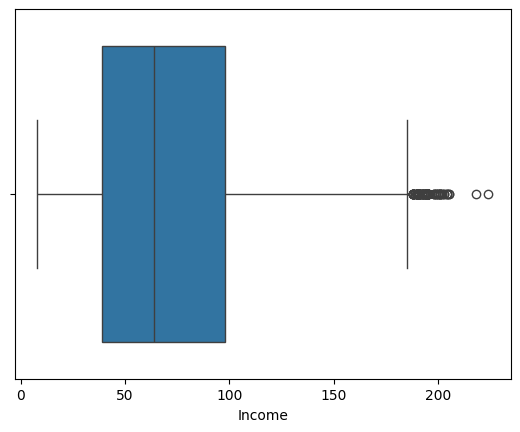

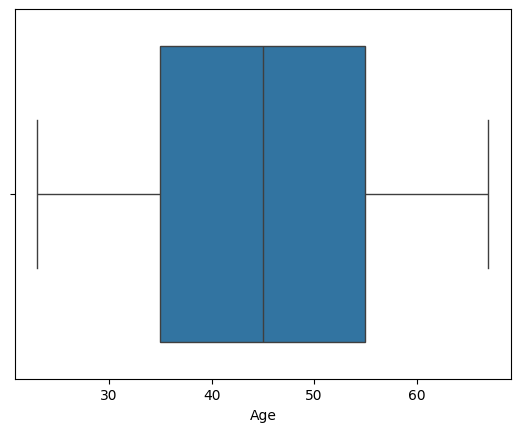

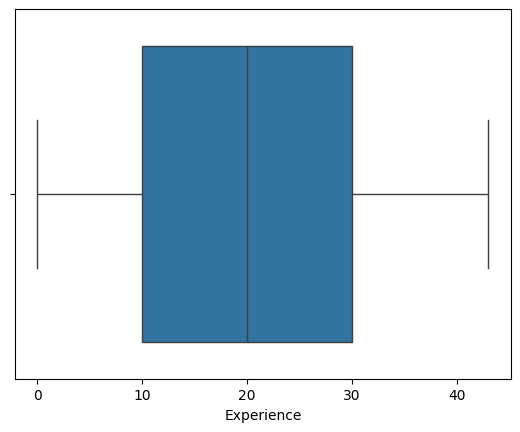

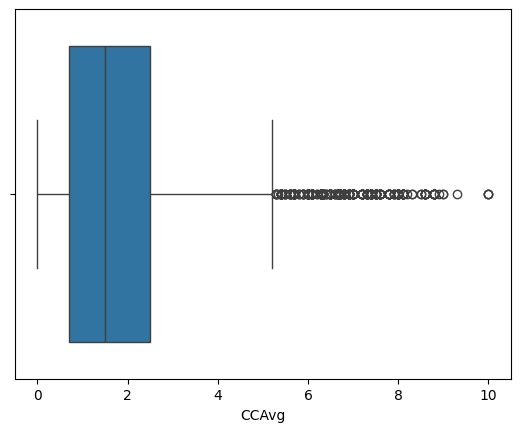

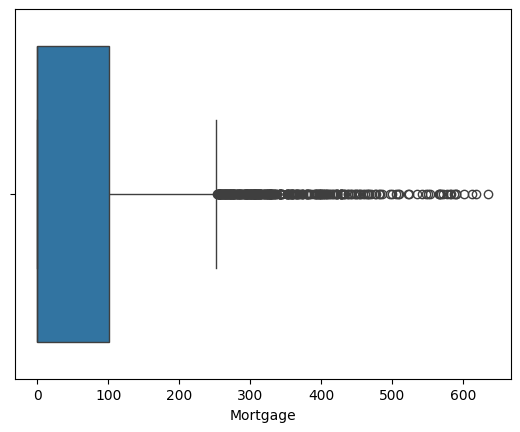

In [ ]:
for col in columns.columns:
    if data[col].dtype!="object":
        sns.boxplot(x=data[col])
        plt.show()


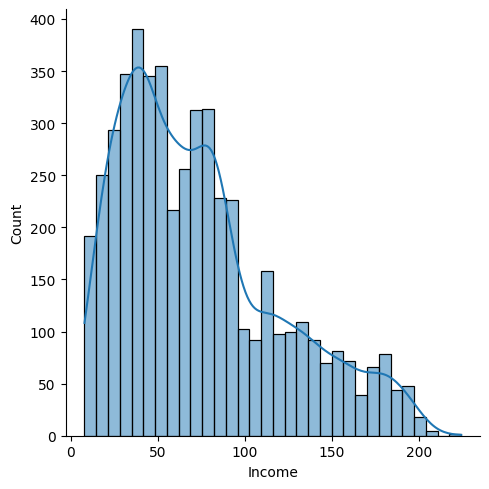

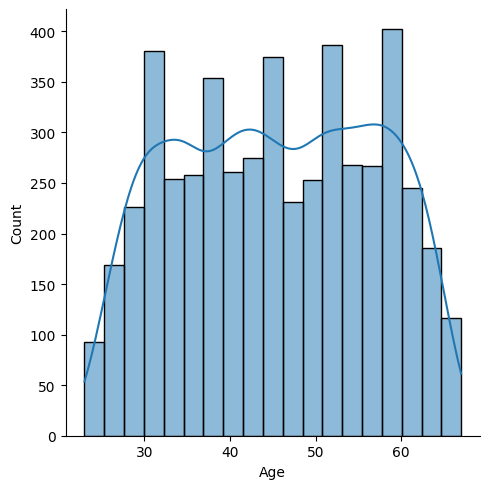

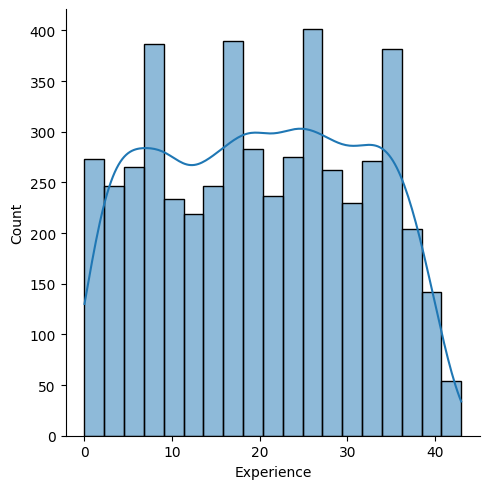

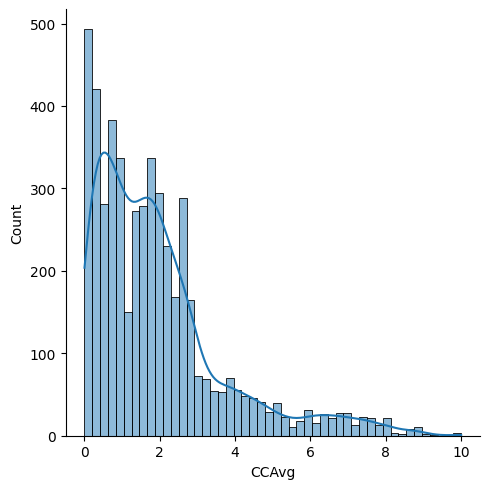

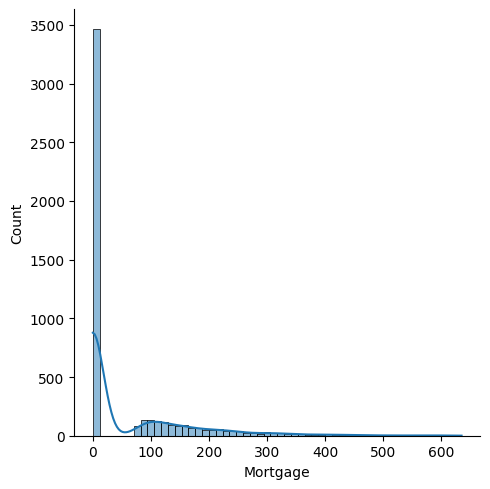

In [ ]:
for col in columns.columns:
    if data[col].dtype !='object':
        sns.displot(x=data[col],kde=True)
    plt.show()

In [ ]:
def show_distributions(data,col):
    plt.figure(figsize=(8, 4))
    # Plotting the first distribution
    plt.subplot(1, 3, 1)
    sns.histplot(np.log1p(data[col]),kde=True,  color='skyblue')
    plt.title('log transformation')
    # Plotting the second distribution
    plt.subplot(1, 3, 2)
    sns.histplot(np.cbrt(data[col]),kde=True,  color='salmon')
    plt.title('cubic root transformation')

    # Plotting the third distribution
    plt.subplot(1, 3, 3)
    sns.histplot(np.sqrt(data[col]), kde=True, color='green')
    plt.title('sqaure root transformation')

    plt.suptitle(f'Distributions for column {col}', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()
    print(f"Skewness with log = {np.log1p(data[col]).skew()} and with cubic root = {np.cbrt(data[col]).skew()} and with square root = {np.sqrt(data[col]).skew()}")

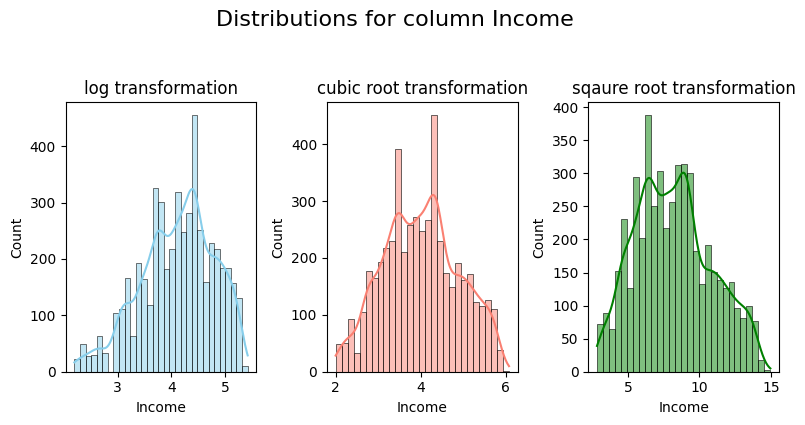

Skewness with log = -0.42071189305490625 and with cubic root = 0.038566294502743854 and with square root = 0.26043573246879353


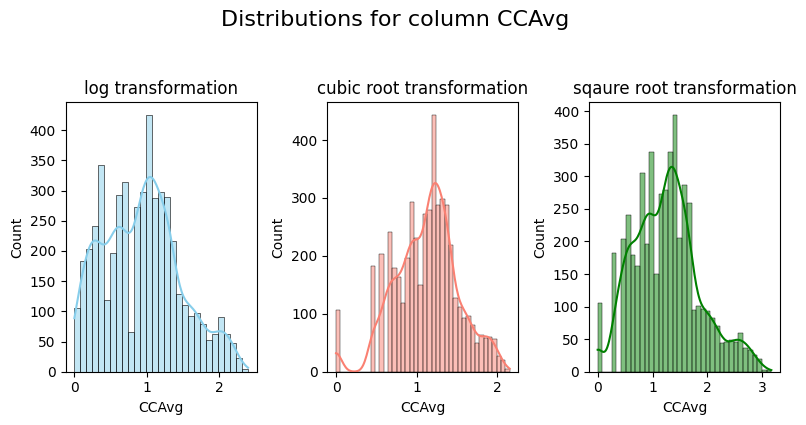

Skewness with log = 0.31922379644464294 and with cubic root = -0.2120571243675497 and with square root = 0.424026404519258


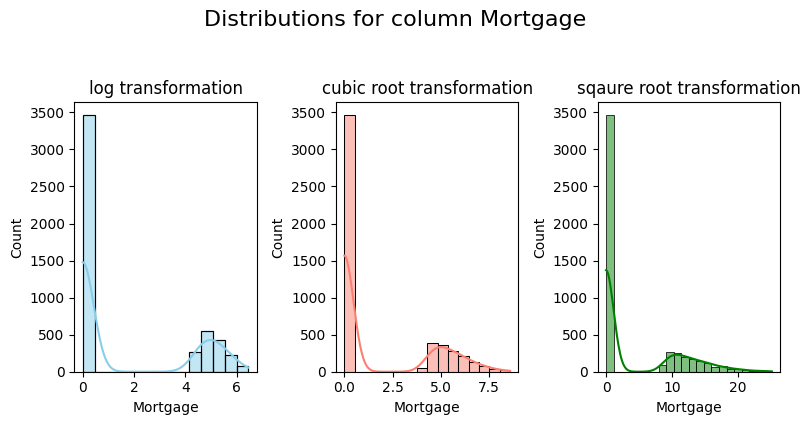

Skewness with log = 0.8766882783607729 and with cubic root = 0.9707725907537634 and with square root = 1.1509108564079351


In [ ]:
columns=['Income','CCAvg','Mortgage']
for col in columns:
  show_distributions(data,col)

In [ ]:
def show_qq(data,col):
    plt.figure(figsize=(8, 4))
    # Plotting the first distribution
    plt.subplot(1, 3, 1)
    stats.probplot(np.log1p(data[col]), dist="norm", plot=plt)
    plt.title('log transformation')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    # Plotting the second distribution
    plt.subplot(1, 3, 2)
    stats.probplot(np.cbrt(data[col]), dist="norm", plot=plt)
    plt.title('cubic root transformation')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    # Plotting the third distribution
    plt.subplot(1, 3, 3)
    stats.probplot(np.sqrt(data[col]), dist="norm", plot=plt)
    plt.title('sqaure root transformation')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.suptitle(f'Q-Q plot for column {col}', fontsize=16, y=1.05)


    plt.tight_layout()
    plt.show()




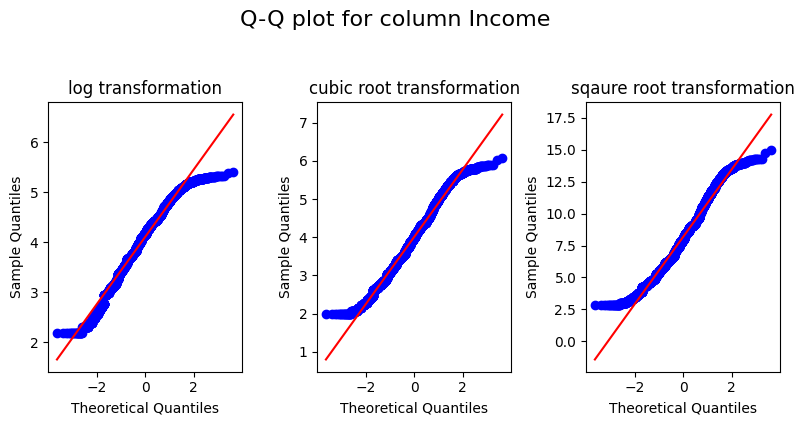

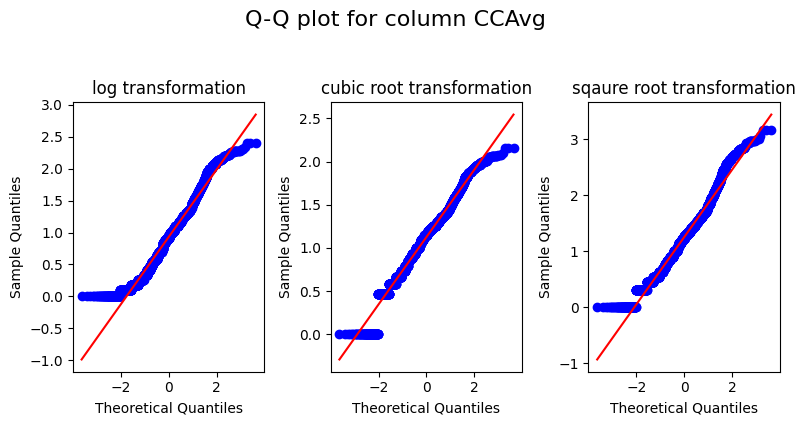

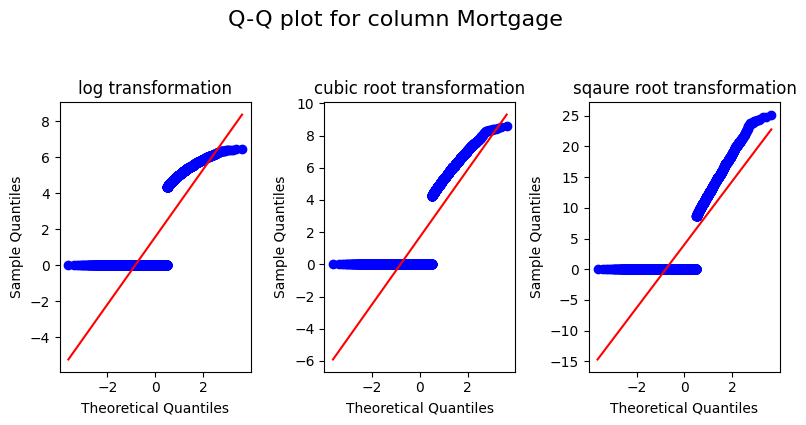

In [ ]:
columns=['Income','CCAvg','Mortgage']
for col in columns:
  show_qq(data,col)

In [ ]:
data['Income']=np.cbrt(data['Income'])
data['CCAvg']=np.log1p(data['CCAvg'])
data['Mortgage']=np.log1p(data['Mortgage'])

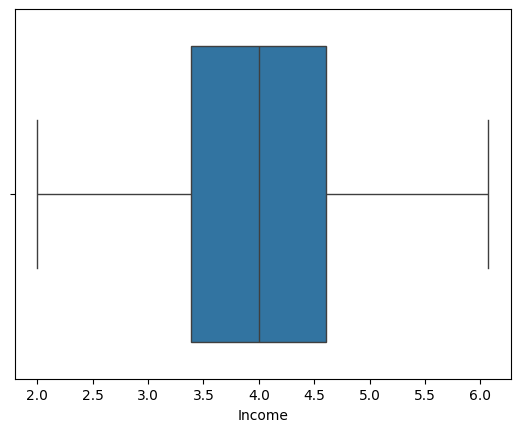

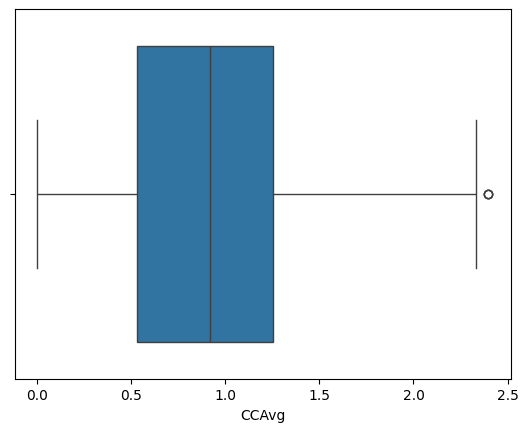

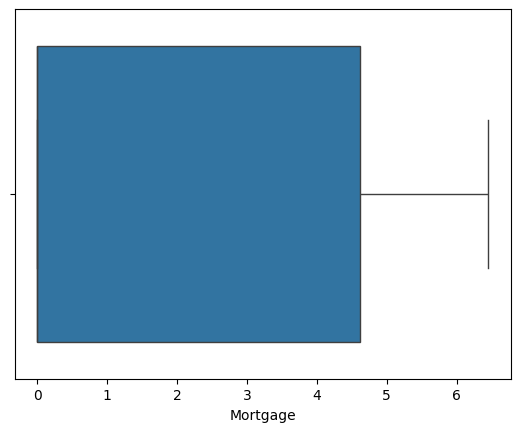

In [ ]:
for col in columns:
    if data[col].dtype!="object":
        sns.boxplot(x=data[col])
        plt.show()

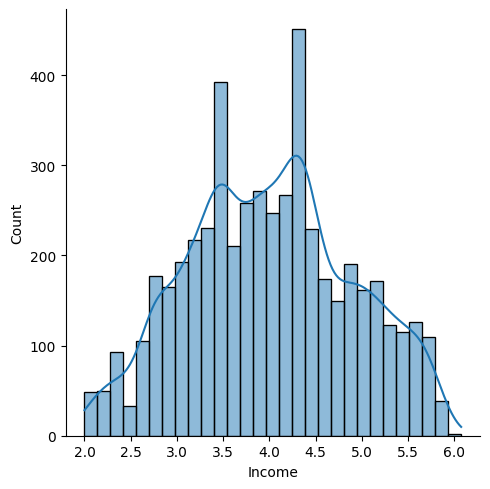

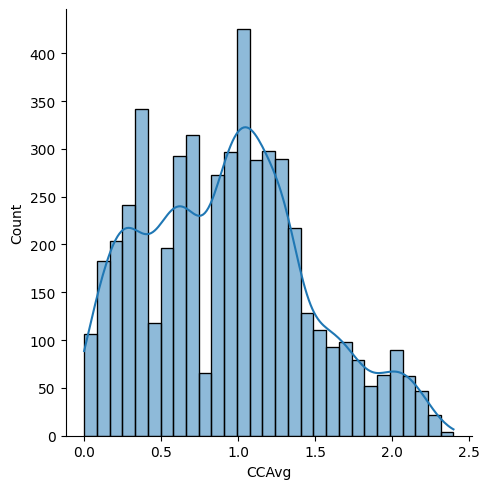

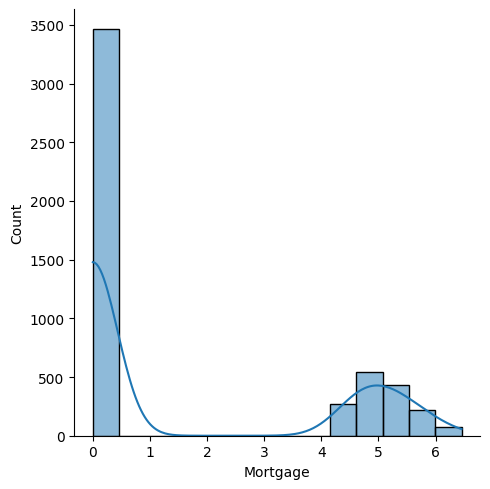

In [ ]:
for col in columns:
    if data[col].dtype !='object':
        sns.displot(x=data[col],kde=True)
    plt.show()


In [ ]:
def calculate_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lower_limit, upper_limit = calculate_outliers((data['Income']))
lower_outliers=len(data[(data['Income'])<lower_limit])
upper_outliers=len(data[(data['Income'])>upper_limit])
print(f"total outliers in col Income  = ",upper_outliers+lower_outliers," with precentage of ",(upper_outliers+lower_outliers)/data.shape[0]*100)

total outliers in col Income  =  0  with precentage of  0.0


In [ ]:
lower_limit, upper_limit = calculate_outliers((data['CCAvg']))
lower_outliers=len(data[(data['CCAvg'])<lower_limit])
upper_outliers=len(data[(data['CCAvg'])>upper_limit])
print(f"total outliers in col CCAvg  = ",upper_outliers+lower_outliers," with precentage of ",(upper_outliers+lower_outliers)/data.shape[0]*100)

total outliers in col CCAvg  =  3  with precentage of  0.06


In [ ]:
lower_limit, upper_limit = calculate_outliers((data['Mortgage']))
lower_outliers=len(data[(data['Mortgage'])<lower_limit])
upper_outliers=len(data[(data['Mortgage'])>upper_limit])
print(f"total outliers in col Mortgage  = ",upper_outliers+lower_outliers," with precentage of ",(upper_outliers+lower_outliers)/data.shape[0]*100)

total outliers in col Mortgage  =  0  with precentage of  0.0


In [ ]:
lower_limit, upper_limit = calculate_outliers(data['CCAvg'])
data['CCAvg'] = np.where(data['CCAvg'] < lower_limit, lower_limit, data['CCAvg'])
data['CCAvg'] = np.where(data['CCAvg'] > upper_limit, upper_limit, data['CCAvg'])

In [ ]:
#Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
standrd_scaler=StandardScaler()
columns=['Age','Experience','Income','Family','CCAvg','Mortgage','Education','ZIP.Code']
for col in columns:
    data[col]=standrd_scaler.fit_transform(np.array(data[col]).reshape(-1,1))

In [ ]:
#Modeling

In [ ]:
#Preparing Data and Selecting Features.

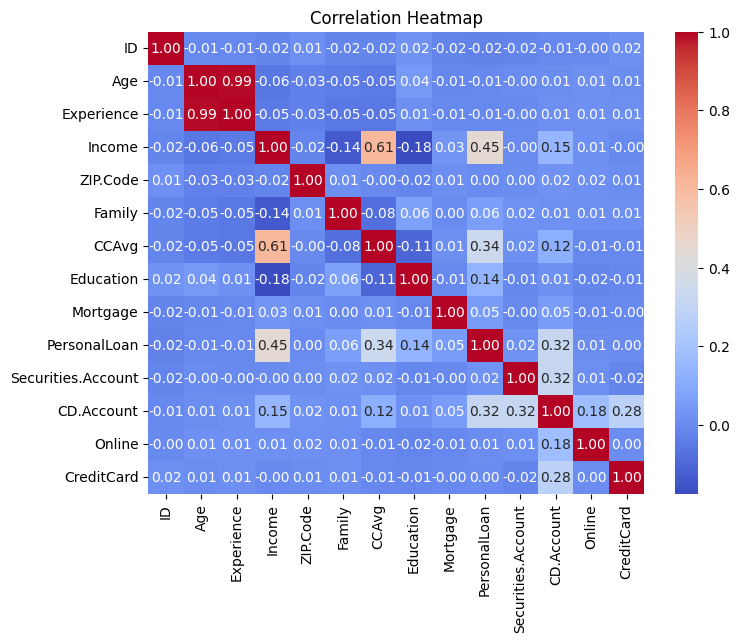

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

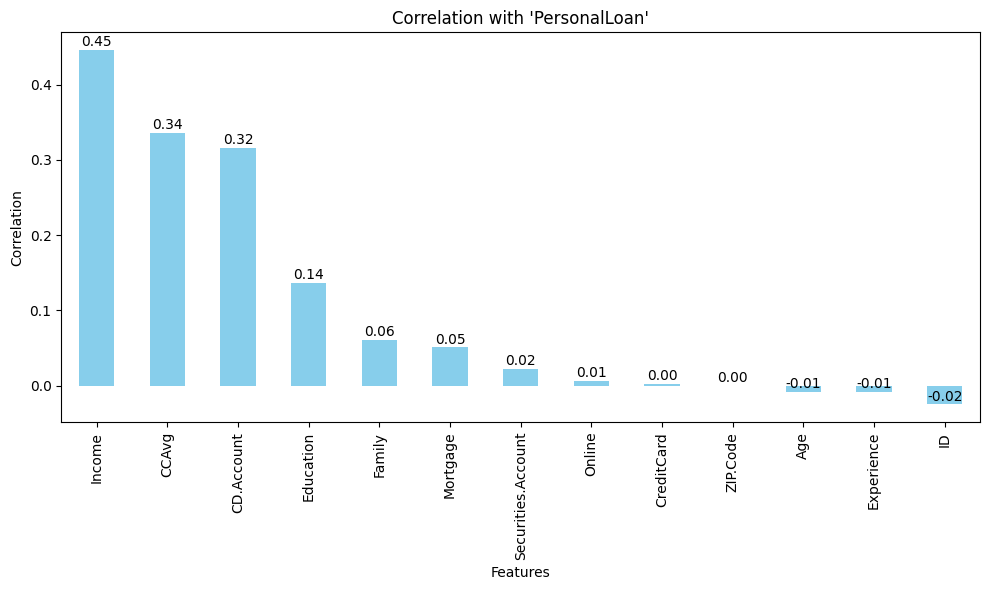

In [ ]:
correlations = data.corr()['PersonalLoan'].drop('PersonalLoan')
sorted_correlations = correlations.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sorted_correlations.plot(kind='bar', color='skyblue')
plt.title("Correlation with 'PersonalLoan'")
plt.xlabel('Features')
plt.ylabel('Correlation')

for i, v in enumerate(sorted_correlations):
    ax.text(i, v + 0.001, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
x=data.drop(['ID','PersonalLoan'],axis=1)
y=data['PersonalLoan']

In [ ]:
x

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
0,-1.774417,-1.676408,-0.390648,-0.964114,1.397414,0.049130,-1.049078,-0.662238,1,0,0,0
1,-0.029524,-0.099404,-0.863640,-1.443932,0.525991,-0.024438,-1.049078,-0.662238,1,0,0,0
2,-0.552992,-0.449849,-2.008249,0.738814,-1.216855,-0.442999,-1.049078,-0.662238,0,0,0,0
3,-0.901970,-0.975517,0.716378,0.452243,-1.216855,0.710935,0.141703,-0.662238,0,0,0,0
4,-0.901970,-1.063129,-0.506066,-0.859007,1.397414,-0.442999,0.141703,-0.662238,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425438,-1.501185,-0.660398,-0.214694,-1.216855,0.253961,1.332484,-0.662238,0,0,1,0
4996,-1.338194,-1.413574,-1.735255,-0.525774,1.397414,-1.112032,-1.049078,1.220259,0,0,1,0
4997,1.540880,1.652823,-1.263849,-0.061039,-0.345432,-1.251040,1.332484,-0.662238,0,0,0,0
4998,1.715370,1.740434,-0.390648,-1.469855,0.525991,-0.982618,0.141703,-0.662238,0,0,1,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: PersonalLoan, Length: 5000, dtype: int64

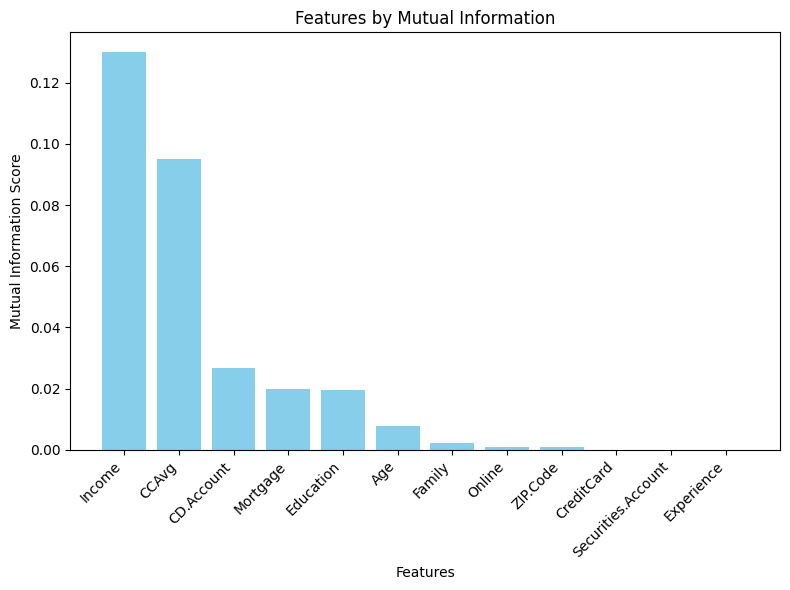

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_scores = mutual_info_classif(x, y,random_state=1)

top_indices = np.argsort(mutual_info_scores)[::-1]


plt.figure(figsize=(8, 6))
plt.bar(x.columns[top_indices], mutual_info_scores[top_indices], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Features by Mutual Information')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
x=data.drop(['ID','ZIP.Code','PersonalLoan','Experience','Online','CreditCard'],axis=1)
y=data['PersonalLoan']

In [ ]:
x

,Age,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account
0,-1.774417,-0.390648,1.397414,0.049130,-1.049078,-0.662238,1,0
1,-0.029524,-0.863640,0.525991,-0.024438,-1.049078,-0.662238,1,0
2,-0.552992,-2.008249,-1.216855,-0.442999,-1.049078,-0.662238,0,0
3,-0.901970,0.716378,-1.216855,0.710935,0.141703,-0.662238,0,0
4,-0.901970,-0.506066,1.397414,-0.442999,0.141703,-0.662238,0,0
...,...,...,...,...,...,...,...,...
4995,-1.425438,-0.660398,-1.216855,0.253961,1.332484,-0.662238,0,0
4996,-1.338194,-1.735255,1.397414,-1.112032,-1.049078,1.220259,0,0
4997,1.540880,-1.263849,-0.345432,-1.251040,1.332484,-0.662238,0,0
4998,1.715370,-0.390648,0.525991,-0.982618,0.141703,-0.662238,0,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: PersonalLoan, Length: 5000, dtype: int64

In [ ]:
#Splitting Data into train and test.


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42,stratify=y)

In [ ]:
y_train.value_counts()

0    2712
1     288
Name: PersonalLoan, dtype: int64

In [ ]:
!pip install imblearn

# Random Forest

In [ ]:
min_samples_split_list = [2,10,20, 30, 50,70, 100,150, 200, 300, 700]
max_depth_list = [1,2, 3, 4,8,10,16,20,25, 32, 64, None]
n_estimators_list = [10,50,100,200,300,400,500]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

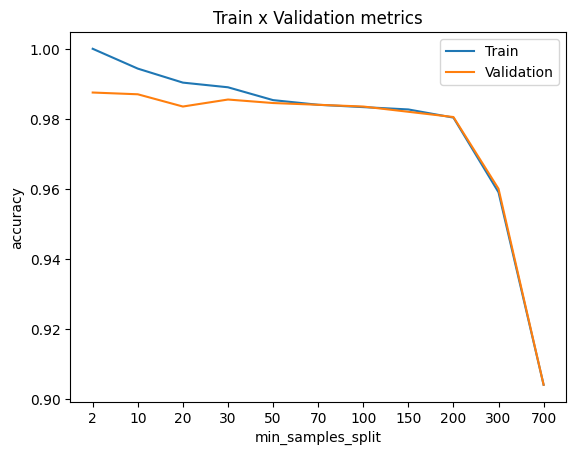

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:

    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 42,n_jobs=4).fit(x_train,y_train)
    predictions_train = model.predict(x_train)
    predictions_val = model.predict(x_test)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
plt.show()

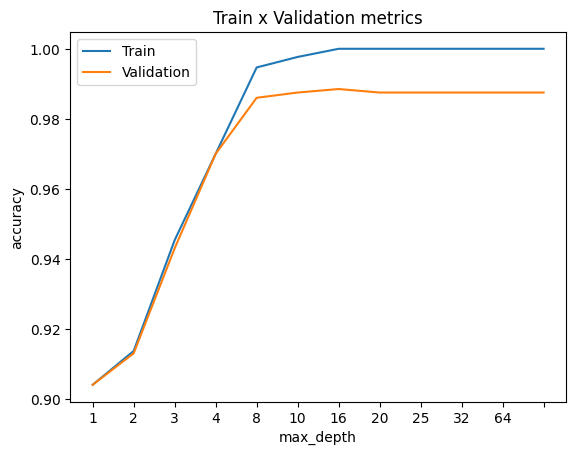

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 42,n_jobs=4).fit(x_train,y_train)
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
plt.show()

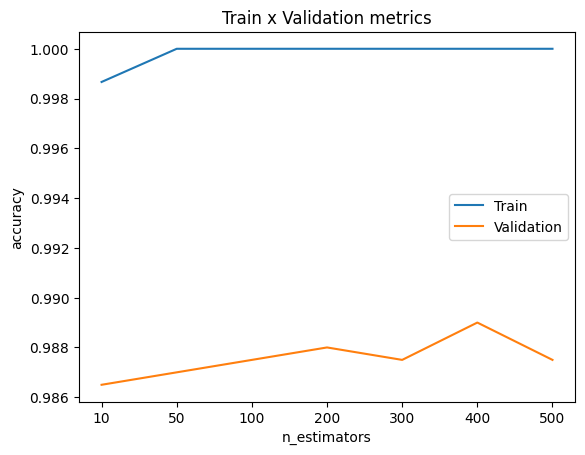

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 42,n_jobs=4).fit(x_train,y_train)
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 500,
                                             max_depth = 10,
                                             min_samples_split = 200,n_jobs=4).fit(x_train,y_train)

In [ ]:
y_pred_train=random_forest_model.predict(x_train)
y_pred=random_forest_model.predict(x_test)

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train,y_pred_train)*100:.1f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_test,y_pred)*100:.1f}")

Metrics train:
	Accuracy score: 96.8
Metrics Test:
	Accuracy score: 97.2


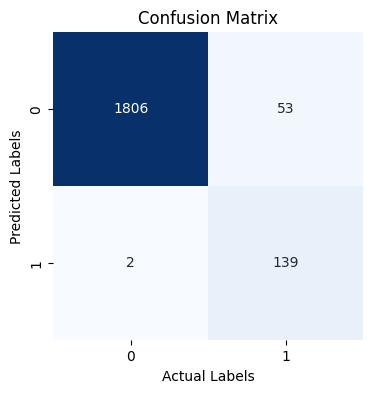

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm.T, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

In [ ]:
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1808
           1       0.99      0.72      0.83       192

    accuracy                           0.97      2000
   macro avg       0.98      0.86      0.91      2000
weighted avg       0.97      0.97      0.97      2000



In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.4/312.4 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5

In [ ]:
import gradio as gr
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Dummy training data for illustration. Replace these with your actual training data
#x_train = np.random.rand(100, 8)  # Example feature data
#y_train = np.random.randint(0, 2, 100)  # Example target data (binary)

# Train the model outside the predict function
lmodel = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=200, n_jobs=4)
lmodel.fit(x_train, y_train)

def predict_loan(Age, Income, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account):
    features = [[Age, Income, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account]]
    pred = lmodel.predict(features)
    target = int(pred[0])  # Convert NumPy array to int for JSON serialization
    return target

demo = gr.Interface(
    fn=predict_loan,
    title="Bank Loan Approval Prediction",
    description='''Bank loan approval prediction involves building a predictive model to assess the likelihood of a loan applicant being approved or denied based on various factors such as income, credit score, employment history, and other relevant features.''',
    theme=gr.themes.Soft(),
    inputs=["number"] * 8,  # Simplified input declaration
    outputs="number"
)

demo.launch(debug=True, inbrowser=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://fcf6c9c443779fd360.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://fcf6c9c443779fd360.gradio.live
